In [2]:
import os
import json
from pprint import pprint

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
SURVEY_DATA = 'data/survey_responses.json'

with open(SURVEY_DATA, 'r') as infile:
    data = json.load(infile)

In [4]:
SURVEY_KEY = {
    "1580501121695": "age",
    "1580502021669": "gender",
    "1580501179775": "wine_consumption", 
    "1580501278669": "purchase_loc",
    "1580501455874": "decision_free_txt",
    "1580501539737": "inform_sentiment",
    "1580501784999": "apps_used",
    "1580502106106": "app_freq",
    "1580502188366": "app_loc",
    "1580502228879": "app_changes"
}

In [5]:
s_list = []
for row in data:
    qid = row['id']
    skey = SURVEY_KEY[qid]
    s = pd.Series([a for a in row['answers']], name=skey)
    s_list.append(s)
    # print(skey, row)
    # print(len(row['answers']))
    
df = pd.concat(s_list, axis=1)


# Create purchase loc columns
PLOC_KEY = {
    'Supermarket': 'ploc_supermarket',
    'Retail Bottle Shop': 'ploc_retail_shop',
    'Restaurant': 'ploc_restaurant',
    'Convenience Store': 'ploc_conv_store',
    'Winery': 'ploc_winery',
    'Other': 'ploc_other',    
}

df_ploc = df['purchase_loc'].str.get_dummies(';')
new_column_names = {}
for orig_name in df_ploc.columns:
    new_name = PLOC_KEY[orig_name]
    new_column_names[orig_name] = new_name
# print(new_column_names)
df = pd.concat([df, df_ploc], axis=1)
df = df.rename(columns=new_column_names)


# Create app used column
USED_KEY = {
    'Delectable': 'used_delectable',
    'Wine.com': 'used_wine_com',
    'Wine Ring': 'used_wine_ring',
    'Wine-Searcher': 'used_wine_searcher',
    'Vivino': 'used_vivino',
    'Other': 'used_other',  
    'I have not used a wine recommendation app': 'used_never'
}

df_used = df['apps_used'].str.get_dummies(';')
new_column_names = {}
for orig_name in df_used.columns:
    new_name = USED_KEY[orig_name]
    new_column_names[orig_name] = new_name
# print(new_column_names)
df = pd.concat([df, df_used], axis=1)
df = df.rename(columns=new_column_names)


del df['purchase_loc']
del df['apps_used']
display(df)
# display(df.head())
# display(df.tail())

,age,gender,wine_consumption,decision_free_txt,inform_sentiment,app_freq,app_loc,app_changes,ploc_conv_store,ploc_other,ploc_restaurant,ploc_retail_shop,ploc_supermarket,ploc_winery,used_delectable,used_never,used_vivino,used_wine_searcher,used_wine_com
0,30 - 39,Male,0,I have some preferred brand,5,1,In store,Not sure now,0,0,0,0,1,1,0,1,0,0,0
1,30 - 39,Male,1-2,meal being paired with.,4,3,At the store.,location integration,0,0,0,1,0,0,1,0,1,0,1
2,18 - 29,Male,1-2,taste,4,1,n/a,n/a,0,0,0,1,1,0,0,1,0,0,0
3,18 - 29,Male,1-2,Past experience with wines I have had,4,3,At home on my phone,Make it easier to find similar wines to me pre...,0,0,0,1,0,1,0,0,1,0,1
4,30 - 39,Female,0,I do it based on recommendations from my friends,4,1,I'd most likely use it on my mobile phone beca...,I'd like it to its popularity star ratings / c...,1,0,0,0,0,0,0,1,0,0,0
5,18 - 29,Male,3-4,Price... I love Stella Rose because it's cheap...,4,2,At home or at a social gathering when I'm tryi...,Filter out better rated wines,0,0,0,1,1,1,0,0,1,0,0
6,18 - 29,Male,1-2,cheap but looks fancy,1,1,I don't,i dont,1,0,0,0,0,0,0,1,0,0,0
7,30 - 39,Male,1-2,Check label and then check rating for that win...,2,1,Not using yet but would like to use it,Not using yet but would like to use it,0,0,0,1,1,0,0,1,0,0,0
8,18 - 29,Male,1-2,"price, and bottle location/origin",4,2,at the store,recommended bottles based on food pairings,1,0,0,1,1,1,0,0,1,0,0
9,30 - 39,Male,0,Which one has a bird on it. Or if it's from a ...,2,1,N/A,N/A,0,0,0,0,1,0,0,1,0,0,0


#### User demographics

In [6]:
df.loc[df['used_never'] == 0].shape

(8, 19)

In [7]:
df1 = df.groupby(['age', 'gender']).sum()
display(df1)

ploc_conv_store  ploc_other  ploc_restaurant  \
age     gender                                                 
18 - 29 Female                1           0                2   
        Male                  2           0                0   
30 - 39 Female                1           1                0   
        Male                  0           0                1   
40 - 49 Male                  0           0                1   

                ploc_retail_shop  ploc_supermarket  ploc_winery  \
age     gender                                                    
18 - 29 Female                 1                 3            3   
        Male                   5                 6            3   
30 - 39 Female                 0                 0            0   
        Male                   2                 4            1   
40 - 49 Male                   0                 0            0   

                used_delectable  used_never  used_vivino  used_wine_searcher  \
age     gender                                                                 
18 - 29 Female                0           2            1                   0   
        Male                  0           3            4                   1   
30 - 39 Female                0           2            0                   0   
        Male                  1           4            1                   0   
40 - 49 Male                  0           0            0                   1   

                used_wine_com  
age     gender                 
18 - 29 Female              0  
        Male                2  
30 - 39 Female              0  
        Male                1  
40 - 49 Male                0

In [22]:
import numpy as np

df2 = df1.reset_index()
df2['used_total'] = 0
df3 = df2
for k, v in USED_KEY.items():
    if v != 'used_never' and v in df2.columns:
        # print(k, v, df2[v])
        df3['used_total'] = df3['used_total'] + df2[v]
# display(df2)

# # Useful test code for creating random choices
# countries = {'Africa':'Ghana','Europe':'France','Europe':'Greece','Asia':'Vietnam','Europe':'Lithuania'}
# df3['Continent'] = np.random.choice(list(countries), len(df3))
# df3['Country'] = df3['Continent'].map(countries)
# # df3['Country'] = df3['cat_choices'].map(countries)

display(df2)

,age,gender,ploc_conv_store,ploc_other,ploc_restaurant,ploc_retail_shop,ploc_supermarket,ploc_winery,used_delectable,used_never,used_vivino,used_wine_searcher,used_wine_com,used_total
0,18 - 29,Female,1,0,2,1,3,3,0,2,1,0,0,1
1,18 - 29,Male,2,0,0,5,6,3,0,3,4,1,2,7
2,30 - 39,Female,1,1,0,0,0,0,0,2,0,0,0,0
3,30 - 39,Male,0,0,1,2,4,1,1,4,1,0,1,3
4,40 - 49,Male,0,0,1,0,0,0,0,0,0,1,0,1


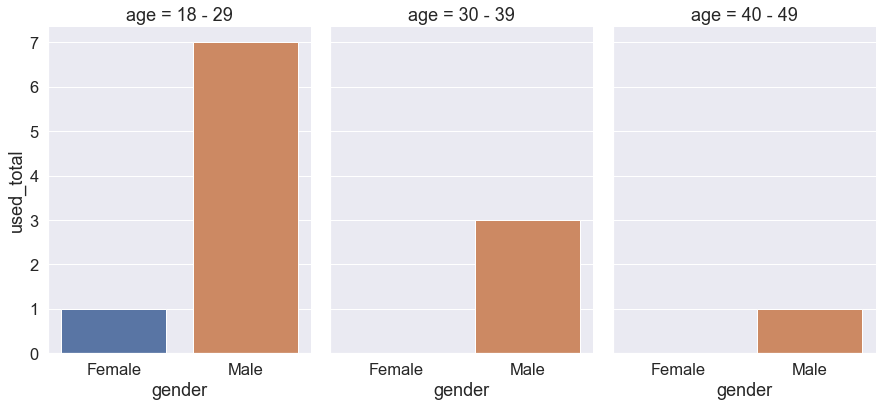

In [23]:
sns.set(font_scale=1.5)
g = sns.catplot(x="gender", y="used_total", col="age", data=df3, kind="bar", height=6, aspect=.7);

### Where are they making their purchases?

In [64]:
df4 = df3.groupby('age').sum().reset_index()
df4

,age,ploc_conv_store,ploc_other,ploc_restaurant,ploc_retail_shop,ploc_supermarket,ploc_winery,used_delectable,used_never,used_vivino,used_wine_searcher,used_wine_com,used_total
0,18 - 29,3,0,2,6,9,6,0,5,5,1,2,8
1,30 - 39,1,1,1,2,4,1,1,6,1,0,1,3
2,40 - 49,0,0,1,0,0,0,0,0,0,1,0,1


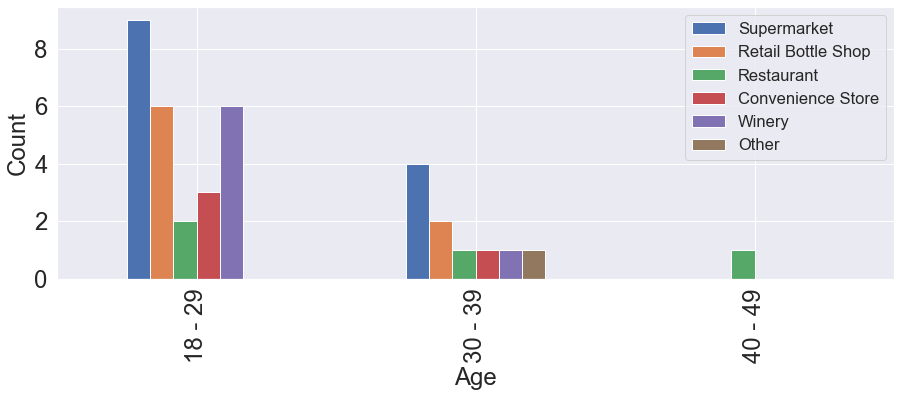

In [65]:
# Don't need to break this out by gender, so just group by age
df4 = df3.groupby('age').sum().reset_index()

plot_columns = []
legend = []
for k, v in PLOC_KEY.items():
    if v in df4.columns:
        plot_columns.append(v)
        legend.append(k)


fig, ax = plt.subplots(figsize=(15, 5))
df4.plot.bar(x='age', y=plot_columns, fontsize=24, ax=ax)
ax.legend(legend)
ax.set_xlabel('Age', fontsize=24)
ax.set_ylabel('Count', fontsize=24)

plt.show()
plt.close()

### How informed do users feel?

In [83]:
inform_sentiment = df['inform_sentiment'].value_counts()
inform_sentiment.name = 'Count'

df5 = pd.DataFrame(inform_sentiment)
df5 = df5.reset_index()
df5 = df5.rename(columns={'index': 'User Rank Num'})
df5 = df5.sort_values(by='User Rank Num', ascending=False)

df5['User Rank'] = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
display(df5)

,User Rank Num,Count,User Rank
3,5,2,Strongly Agree
0,4,8,Agree
2,3,3,Neutral
1,2,5,Disagree
4,1,1,Strongly Disagree


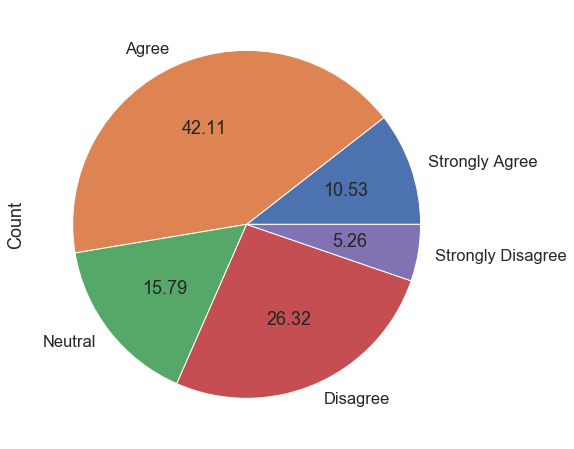

In [93]:
df5['Count'].plot.pie(labels=df5['User Rank'].values, autopct='%.2f', figsize=(8,8))